In [1]:
pip install vitaldb


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 42.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16/16 [vitaldb]4/16 [wfdb]ache]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
from vitaldb import VitalFile

vf = VitalFile('./0822.vital')

# Check what's inside
print(type(vf.trks))           # What type is it?



<class 'dict'>


In [8]:
track_names = list(vf.trks.keys())
print("Available track names:", track_names[:10])


Available track names: ['SNUADC/ART', 'SNUADC/ECG_II', 'SNUADC/ECG_V5', 'SNUADC/PLETH', 'Solar8000/HR', 'Solar8000/ST_I', 'Solar8000/ST_II', 'Solar8000/ST_III', 'Solar8000/ST_V5', 'Solar8000/ST_AVL']


In [9]:
import pandas as pd

# Pick signals that actually exist in your file
signals = ['SNUADC/ART', 'SNUADC/ECG_II', 'SNUADC/ECG_V5', 'SNUADC/PLETH', 'Solar8000/HR', 'Solar8000/ST_I', 'Solar8000/ST_II', 'Solar8000/ST_III', 'Solar8000/ST_V5', 'Solar8000/ST_AVL']

# Check if they exist
for signal in signals:
    if signal not in vf.trks:
        print(f"Track {signal} not found in file.")

# Convert to DataFrame
df = vf.to_pandas(signals, interval=1)  # 1-second intervals
print(df.head())

   SNUADC/ART  SNUADC/ECG_II  SNUADC/ECG_V5  SNUADC/PLETH  Solar8000/HR  \
0         NaN            NaN            NaN           NaN           NaN   
1   -3.872406       0.425381       0.267387     32.024582           NaN   
2         NaN            NaN            NaN           NaN           NaN   
3   -3.872406       0.079771       1.195597     44.269058           NaN   
4   -3.872406       0.129143       0.464879     37.554337          65.0   

   Solar8000/ST_I  Solar8000/ST_II  Solar8000/ST_III  Solar8000/ST_V5  \
0             NaN              NaN               NaN              NaN   
1             NaN              NaN               NaN              NaN   
2             NaN              NaN               NaN              NaN   
3             NaN              NaN               NaN              NaN   
4             0.1             -0.1               0.4              2.0   

   Solar8000/ST_AVL  
0               NaN  
1               NaN  
2               NaN  
3               NaN  


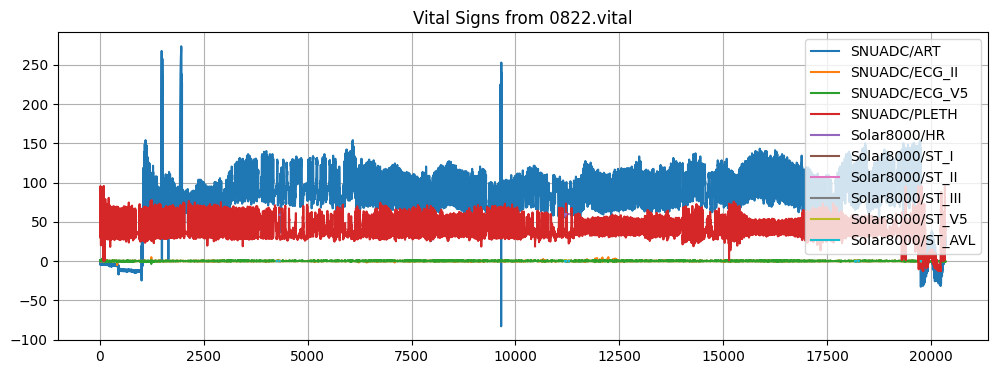

In [10]:
import matplotlib.pyplot as plt

df.plot(figsize=(12, 4), title="Vital Signs from 0822.vital")
plt.grid(True)
plt.show()
